<a href="https://colab.research.google.com/github/kareemullah123456789/MLE/blob/main/TreeAlgos_Data_Preprocessing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
ls /content/drive/MyDrive/HV

custom_functions.py                      processing_data.py
Feature_engineering_and_PCA_Class.ipynb  __pycache__/
HR.csv                                   spam.csv
Loading_from_pickle_titanic.ipynb        spam.tsv
loan_approved.csv                        SVM_Implementation.ipynb
Naive_Bayes.ipynb                        SVM_Preprocessing.ipynb
output.csv                               train.csv
preprocessing.py                         Transformer_pickle_demo.ipynb
processed_data.pkl                       TreeAlgos_Data_Preprocessing.ipynb
Processed_data.pkl                       Tree_CT.pkl
Processed_data.pkl.pkl                   Trees_Implementation.ipynb


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/HV')


In [ ]:
import os

base_path = "/content/drive/MyDrive/HV"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(os.path.join(base_path,"HR.csv"))

### Basic Checks

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
pd.set_option('display.max_columns',None)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

In [ ]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Correlation - Feature selection

In [ ]:
df.select_dtypes(include=['int', 'float']).corr()
#df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


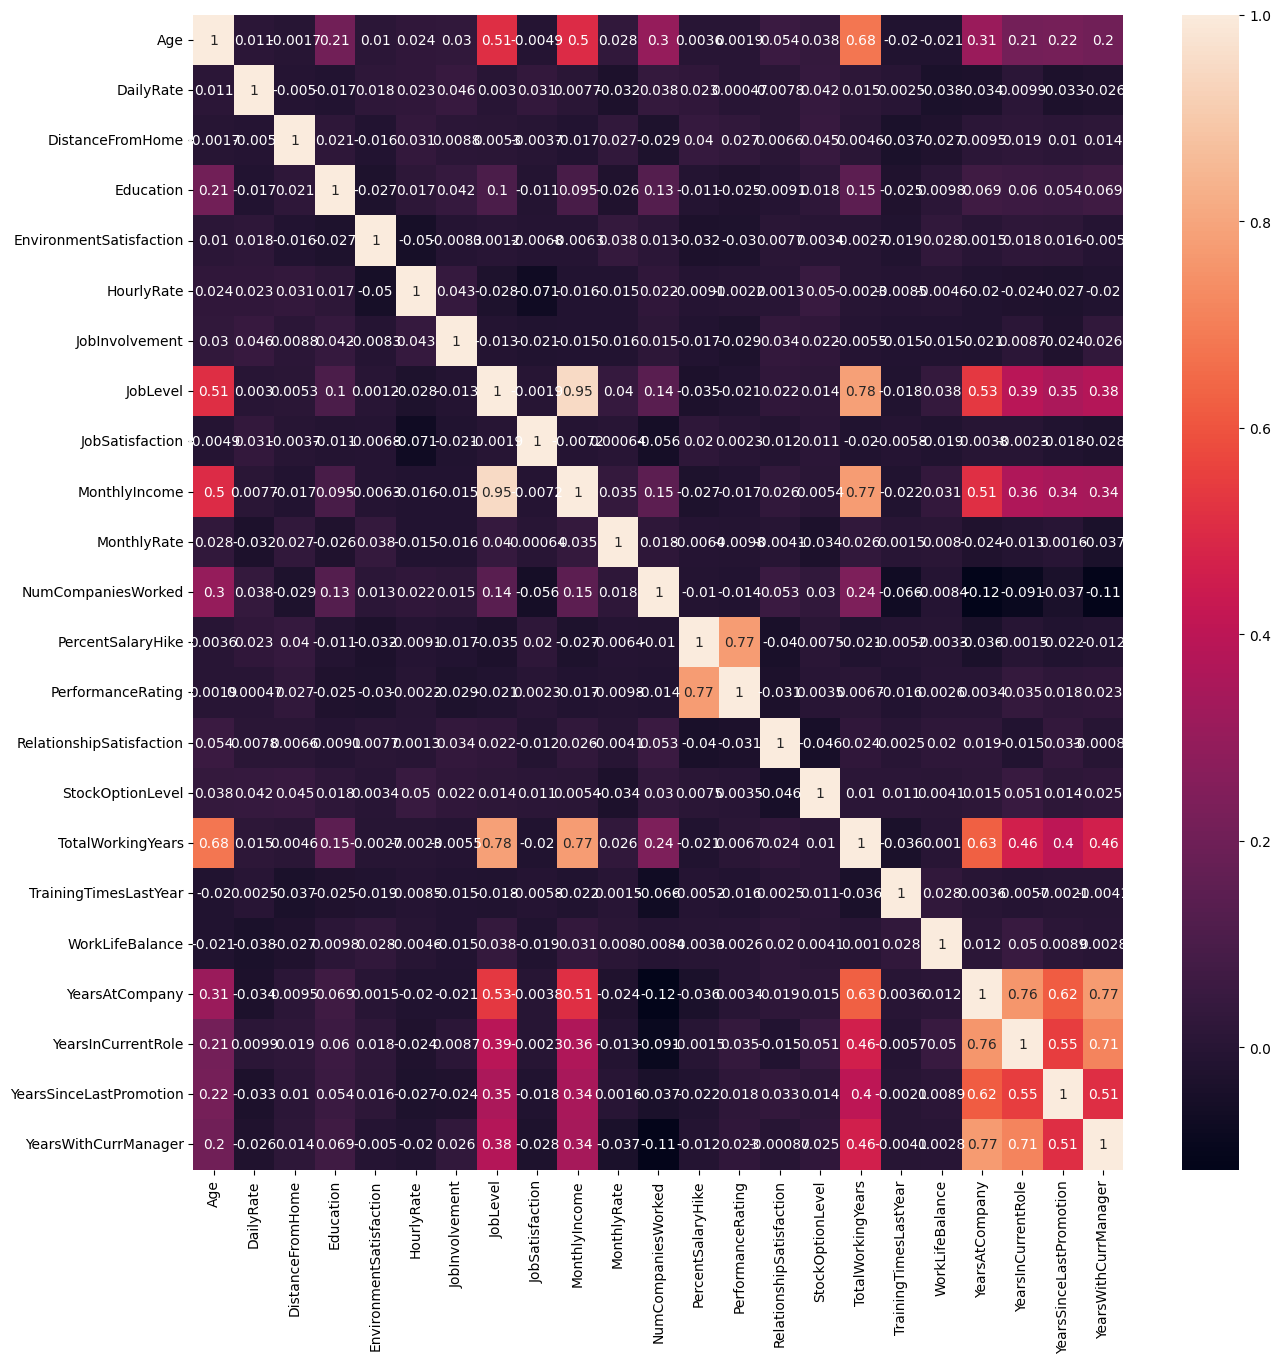

In [ ]:
plt.figure(figsize=(15,15))#increase plot size
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),annot=True)
plt.show()

In [ ]:
df.drop('MonthlyIncome',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
for i in df.columns:
    print('\nNo. of unique values in',i,':',len(df[i].unique()),' values ranging from ',df[i].min(), ' to ',df[i].max(),'\t',df[i].dtype,'\t')


No. of unique values in Age : 43  values ranging from  18  to  60 	 int64 	

No. of unique values in Attrition : 2  values ranging from  No  to  Yes 	 object 	

No. of unique values in BusinessTravel : 3  values ranging from  Non-Travel  to  Travel_Rarely 	 object 	

No. of unique values in DailyRate : 886  values ranging from  102  to  1499 	 int64 	

No. of unique values in Department : 3  values ranging from  Human Resources  to  Sales 	 object 	

No. of unique values in DistanceFromHome : 29  values ranging from  1  to  29 	 int64 	

No. of unique values in Education : 5  values ranging from  1  to  5 	 int64 	

No. of unique values in EducationField : 6  values ranging from  Human Resources  to  Technical Degree 	 object 	

No. of unique values in EnvironmentSatisfaction : 4  values ranging from  1  to  4 	 int64 	

No. of unique values in Gender : 2  values ranging from  Female  to  Male 	 object 	

No. of unique values in HourlyRate : 71  values ranging from  30  to  100 	 int6

### Preprocessing Pipeline

In [ ]:
len(df.columns)

30

In [ ]:
for i in df.columns:
    if (len(df[i].unique())>9):
        if (df[i].max()>10):
            print('\nNo. of unique values in',i,':',len(df[i].unique()),'with value ranging from',df[i].min(),'to',df[i].max(),'\t',df[i].dtype,'\t')


No. of unique values in Age : 43 with value ranging from 18 to 60 	 int64 	

No. of unique values in DailyRate : 886 with value ranging from 102 to 1499 	 int64 	

No. of unique values in DistanceFromHome : 29 with value ranging from 1 to 29 	 int64 	

No. of unique values in HourlyRate : 71 with value ranging from 30 to 100 	 int64 	

No. of unique values in MonthlyRate : 1427 with value ranging from 2094 to 26999 	 int64 	

No. of unique values in PercentSalaryHike : 15 with value ranging from 11 to 25 	 int64 	

No. of unique values in TotalWorkingYears : 40 with value ranging from 0 to 40 	 int64 	

No. of unique values in YearsAtCompany : 37 with value ranging from 0 to 40 	 int64 	

No. of unique values in YearsInCurrentRole : 19 with value ranging from 0 to 18 	 int64 	

No. of unique values in YearsSinceLastPromotion : 16 with value ranging from 0 to 15 	 int64 	

No. of unique values in YearsWithCurrManager : 18 with value ranging from 0 to 17 	 int64 	


In [ ]:
OHE_columns=['BusinessTravel','Department','MaritalStatus','EducationField','Gender','JobRole']
standard_scaler=['Age', 'DailyRate', 'DistanceFromHome','MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','PercentSalaryHike']
label_encoder=['OverTime']
passthrough=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction', 'TrainingTimesLastYear','RelationshipSatisfaction',
             'StockOptionLevel','WorkLifeBalance','PerformanceRating']

In [ ]:
#Ensuring that the count of columns is matching
len(OHE_columns)+len(standard_scaler)+len(label_encoder)+len(passthrough)

29

In [ ]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [ ]:
preprocessor = ColumnTransformer([
    ("OHE columns", OneHotEncoder(), OHE_columns),
    ("Label_encoder", OrdinalEncoder(), label_encoder),
    ("Standard_scaler", StandardScaler(), standard_scaler)],remainder='passthrough')

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE columns', OneHotEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'MaritalStatus', 'EducationField', 'Gender',
                                  'JobRole']),
                                ('Label_encoder', OrdinalEncoder(),
                                 ['OverTime']),
                                ('Standard_scaler', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'MonthlyRate', 'HourlyRate',
                                  'NumCompaniesWorked', 'TotalWorkingYears',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager',
                                  'PercentSalaryHike'])])

In [ ]:
# with open('Tree_CT.pkl','wb') as f:
#     pickle.dump(preprocessor,f)
#     f.close

In [ ]:
with open(os.path.join(base_path, "Tree_CT.pkl"), "wb") as f:
    pickle.dump(preprocessor, f)

In [ ]:
ls /content/drive/MyDrive/HV

custom_functions.py                      processing_data.py
Feature_engineering_and_PCA_Class.ipynb  __pycache__/
HR.csv                                   spam.csv
Loading_from_pickle_titanic.ipynb        spam.tsv
loan_approved.csv                        SVM_Implementation.ipynb
Naive_Bayes.ipynb                        SVM_Preprocessing.ipynb
output.csv                               train.csv
preprocessing.py                         Transformer_pickle_demo.ipynb
processed_data.pkl                       TreeAlgos_Data_Preprocessing.ipynb
Processed_data.pkl                       Tree_CT.pkl
Processed_data.pkl.pkl                   Trees_Implementation.ipynb


In [ ]:
with open(os.path.join(base_path, "Processed_data.pkl"),'wb') as f:
    pickle.dump(df,f)
    f.close

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E25B-F2F8

 Directory of C:\Users\LENOVO\cds\HV

23-08-2025  07:22    <DIR>          .
23-08-2025  07:22    <DIR>          ..
23-08-2025  07:21    <DIR>          .ipynb_checkpoints
23-08-2025  07:15               772 custom_functions.py
23-08-2025  07:14            72,776 Feature_engineering_and_PCA_Class.ipynb
23-08-2025  07:17           227,977 HR.csv
23-08-2025  07:14            38,669 Loading_from_pickle_titanic.ipynb
23-08-2025  07:15            38,022 loan_approved.csv
23-08-2025  07:13            27,228 Naive_Bayes.ipynb
23-08-2025  07:21               544 preprocessing.py
23-08-2025  07:22           284,124 Processed_data.pkl
23-08-2025  07:21               544 processing_data.py
23-08-2025  07:17           483,636 spam.csv
23-08-2025  07:17           477,256 spam.tsv
23-08-2025  07:14           114,682 SVM_Implementation.ipynb
23-08-2025  07:14         3,441,744 SVM_Preprocessing.ipynb
23-08-2025  07:16            61,19